In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
CD4_list=[]
df1=pd.read_csv('data1.csv')
grouped=df1.groupby(['ID'])
for name,group in grouped:
    CD4_list.append(float(group.iloc[:1]['CD4_Count']))

In [4]:
df_CD4=pd.DataFrame({'CD4':CD4_list})
df_CD4

,CD4
0,178.0
1,14.0
2,101.0
3,10.0
4,161.0
...,...
178,61.0
179,73.0
180,82.0
181,44.0


In [5]:
df_CD4.describe()

,CD4
count,183.000000
mean,83.475410
std,68.724631
min,0.000000
25%,22.000000
50%,73.000000
75%,136.000000
max,310.000000


In [28]:
df_CD4=df1.iloc[:0]
df_CD4_low=df1.iloc[:0]

In [44]:
#取平均值进行分组，低于136的视为免疫力比较差的人群，高于136视为免疫力强的人群
for name,group in grouped:
        if(len(group.iloc[:5])==5 and group['HIV_Count'].isnull().any()==False):
            if(float(group.iloc[:1]['CD4_Count'])>136):
                df_CD4=pd.concat([df_CD4,group])
            else:
                df_CD4_low=pd.concat([df_CD4_low,group])

      ID  CD4_Time  CD4_Count  HIV_Time  HIV_Count
0  23424       0.0      178.0       0.0        5.5
1  23424       4.0      228.0       4.0        3.9
2  23424       8.0      126.0       8.0        4.7
3  23424      25.0      171.0      25.0        4.0
4  23424      40.0       99.0      40.0        5.0
       ID  CD4_Time  CD4_Count  HIV_Time  HIV_Count
21  23428       0.0      161.0       0.0        5.5
22  23428       3.0      220.0       3.0        2.5
23  23428       8.0      316.0       8.0        1.9
24  23428      24.0      645.0      24.0        1.7
25  23428      40.0      451.0      40.0        1.7
       ID  CD4_Time  CD4_Count  HIV_Time  HIV_Count
80  23441       0.0      139.0       0.0        5.3
81  23441       4.0      289.0       4.0        4.3
82  23441       8.0      209.0       8.0        4.6
83  23441      24.0      238.0      24.0        4.9
84  23441      39.0      196.0      39.0        5.1
       ID  CD4_Time  CD4_Count  HIV_Time  HIV_Count
85  23442       0.

In [46]:
#现在的数据的格式是 均为5次检测 且HIV数量这一列并不存在缺失值
df_CD4_low.head(5)

,ID,CD4_Time,CD4_Count,HIV_Time,HIV_Count
32,23430,0.0,78.0,0.0,5.6
33,23430,4.0,140.0,4.0,2.1
34,23430,7.0,245.0,7.0,1.8
35,23430,24.0,201.0,24.0,1.7
36,23430,39.0,220.0,39.0,1.7


In [47]:
df_CD4.head(5)

,ID,CD4_Time,CD4_Count,HIV_Time,HIV_Count
0,23424,0.0,178.0,0.0,5.5
1,23424,4.0,228.0,4.0,3.9
2,23424,8.0,126.0,8.0,4.7
3,23424,25.0,171.0,25.0,4.0
4,23424,40.0,99.0,40.0,5.0


In [50]:
def return_result(df_CD4):
    hiv_0_list=[]
    hiv_1_list=[]
    hiv_2_list=[]
    hiv_3_list=[]
    hiv_4_list=[]
    grouped=df_CD4.groupby(['ID'])
    for name,group in grouped:
        hiv_0_list.append(float(group.iloc[:1]['HIV_Count']))
        hiv_1_list.append(float(group.iloc[1:2]['HIV_Count']))
        hiv_2_list.append(float(group.iloc[2:3]['HIV_Count']))
        hiv_3_list.append(float(group.iloc[3:4]['HIV_Count']))
        hiv_4_list.append(float(group.iloc[4:5]['HIV_Count']))
    hiv_0=sum(hiv_0_list)/len(hiv_0_list)
    hiv_1=sum(hiv_1_list)/len(hiv_1_list)
    hiv_2=sum(hiv_2_list)/len(hiv_2_list)
    hiv_3=sum(hiv_3_list)/len(hiv_3_list)
    hiv_4=sum(hiv_4_list)/len(hiv_4_list)
    return [hiv_0,hiv_1,hiv_2,hiv_3,hiv_4]
hiv_high_list=return_result(df_CD4)
hiv_low_list=return_result(df_CD4_low)

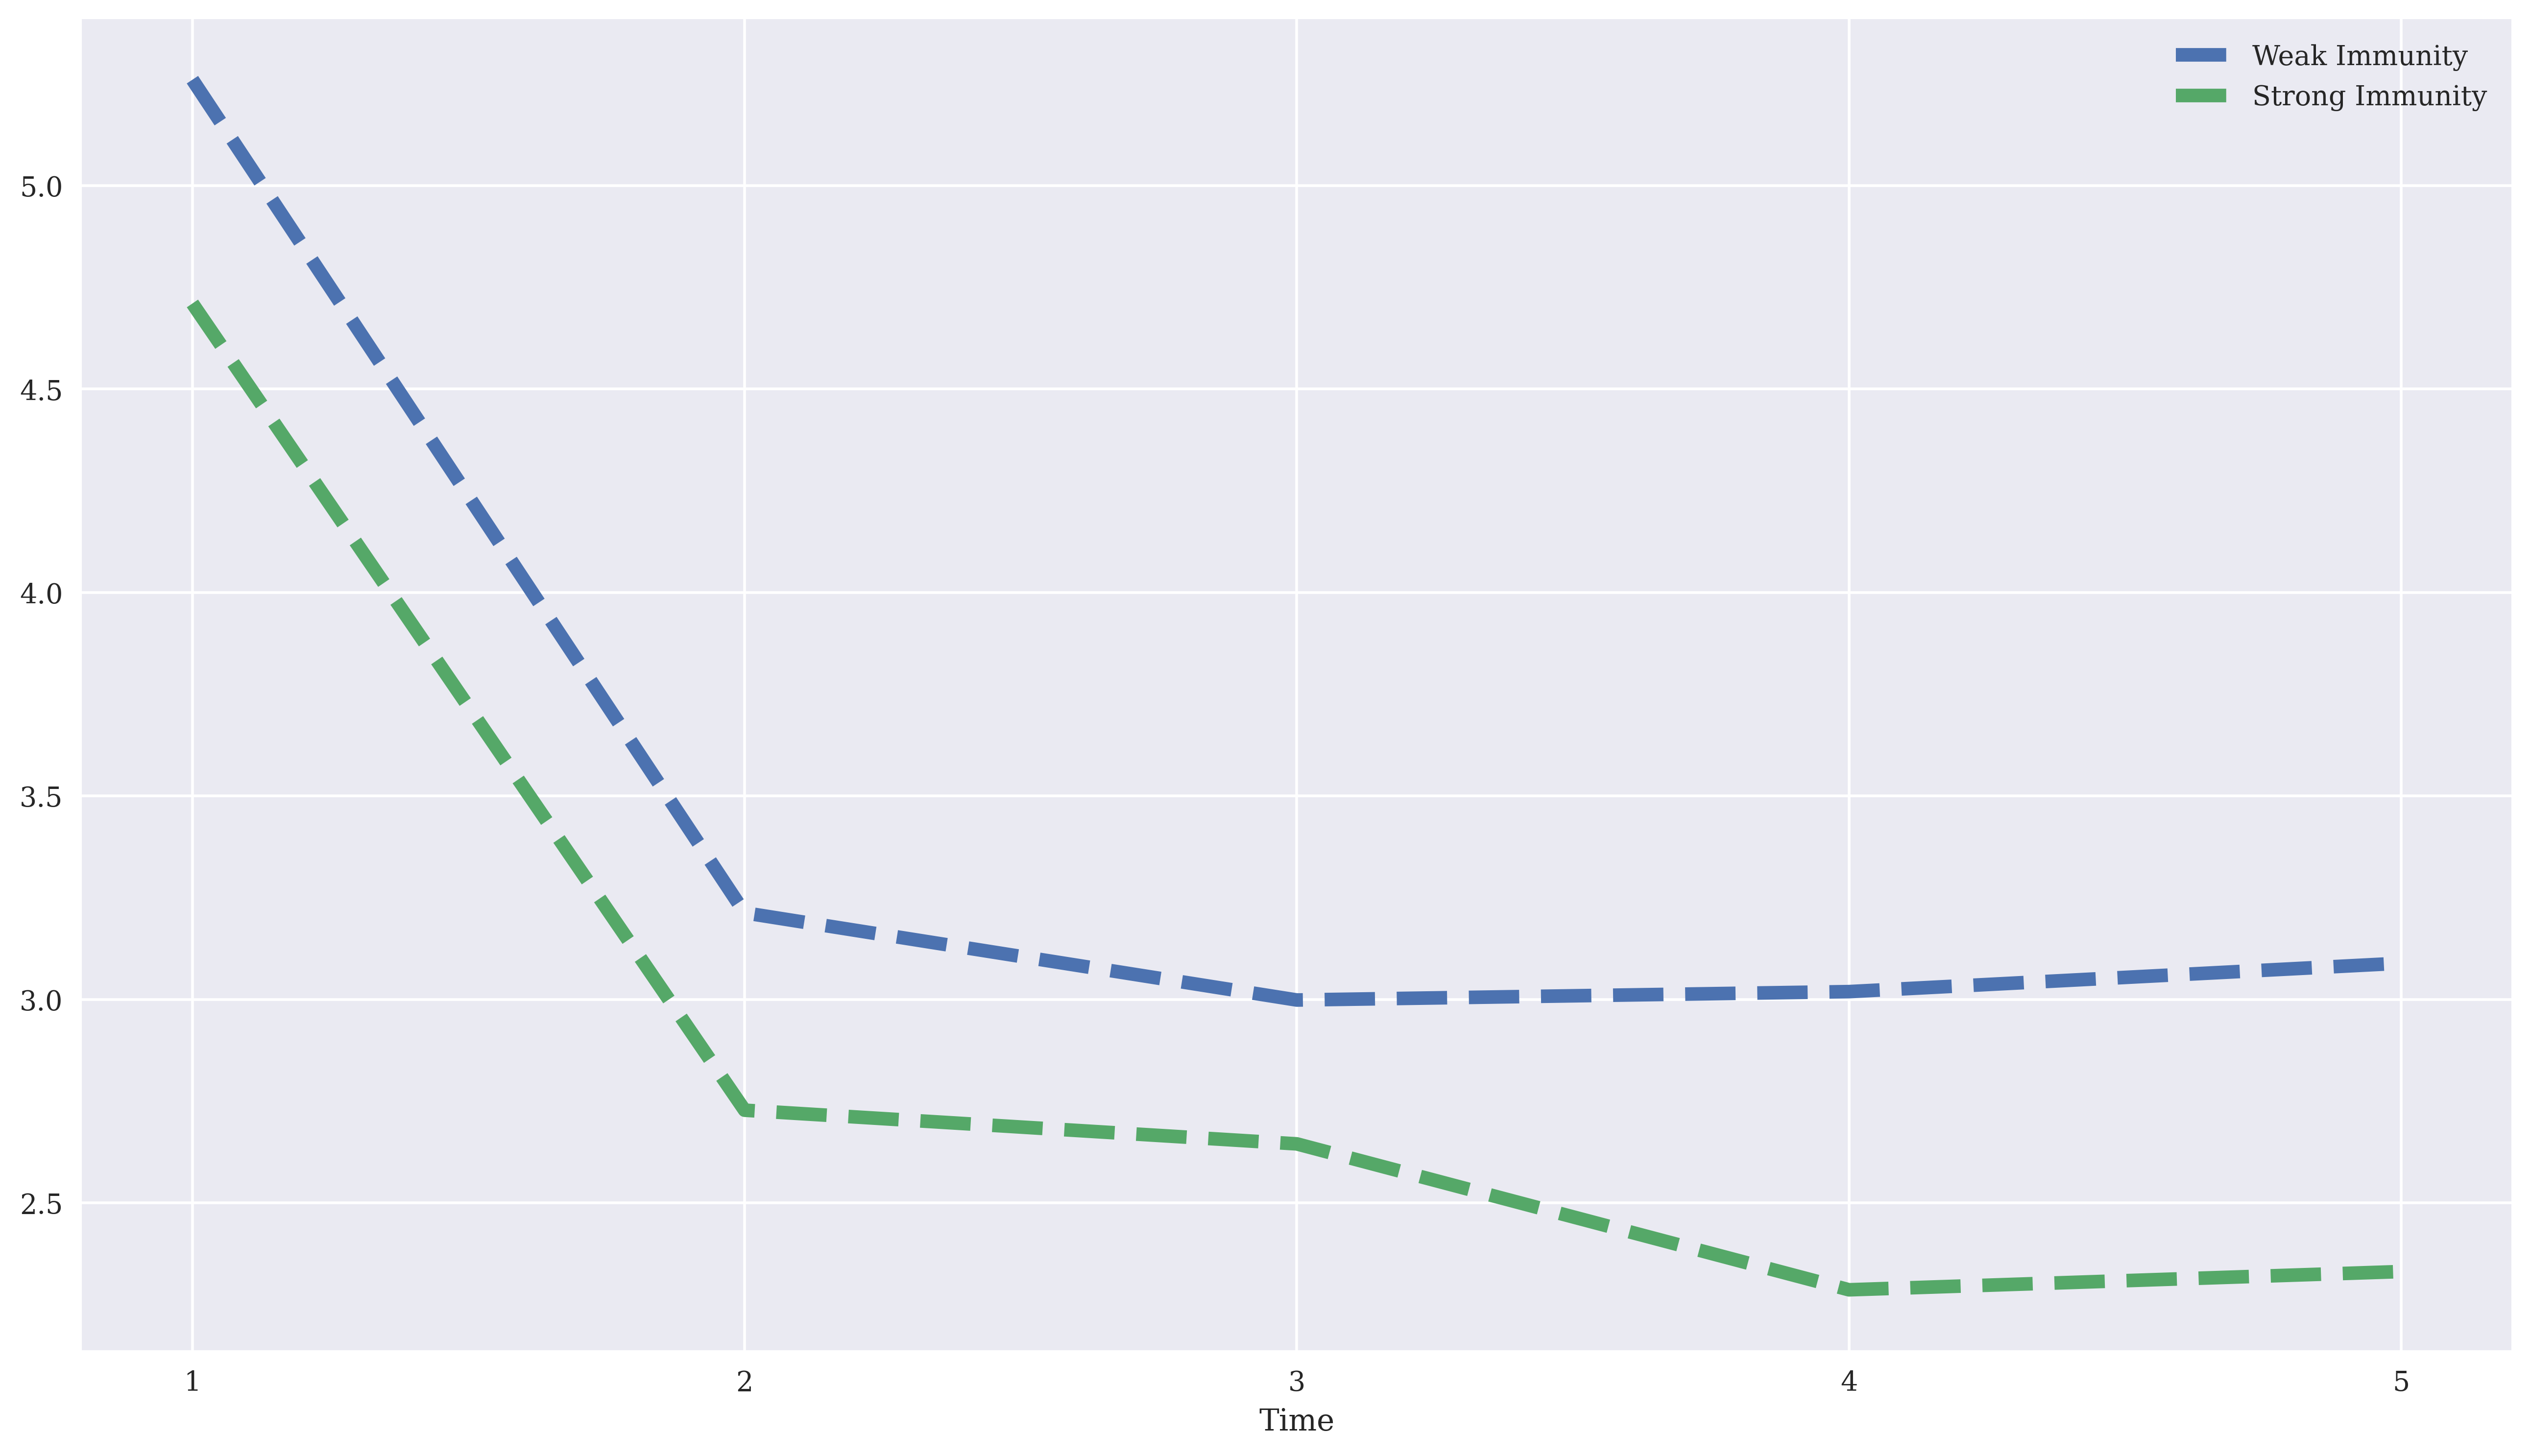

In [76]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=400)
plt.plot(range(1,6),hiv_low_list,ls='--',lw=5,label='Weak Immunity')
plt.plot(range(1,6),hiv_high_list,ls='--',lw=5,label='Strong Immunity')
#plt.title('免疫能力强的患者HIV病毒变化图像',fontproperties=font)
plt.ylabel('',fontproperties=font)
plt.xlabel('Time')
plt.xticks(range(1,6),[1,2,3,4,5],)
plt.legend()
plt.show()

In [184]:
import math
#观察出来时刻数列是 3，8，10，14，17
t=np.array(hiv_high_list)
t=t+18
#将数列进行一次累加求和
t1=np.cumsum(t)
print(t1)
print(t)

[ 22.71034483  43.43793103  64.08275862  84.36896552 104.7       ]
[22.71034483 20.72758621 20.64482759 20.2862069  20.33103448]


In [185]:
min=math.e**(-2/(len(t)+1))
max=math.e**(2/(len(t)+2))
#首先验证阶比是否满足条件
for i in range(2,len(t)):
    j=t[i-1]/t[i]
    if(j<min or j>max):
        print(i)

In [186]:
#生成邻均值数列（相邻两个数据的均值）
z1= ((t1[:len(t1) - 1] + t1[1:])/2.0).reshape(-1,1)
print(z1)

[[33.07413793]
 [53.76034483]
 [74.22586207]
 [94.53448276]]


In [187]:
Y=t[1:].reshape(-1,1)
B=np.append(-z1,np.ones_like(z1),axis=1)
print(B)

[[-33.07413793   1.        ]
 [-53.76034483   1.        ]
 [-74.22586207   1.        ]
 [-94.53448276   1.        ]]


In [190]:
#使用最小二乘法求解a，b的值（感谢大佬铺路）
[[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Y)#计算待估参数
#第i时刻的预测值，解一阶累加得到的方程（注意下标 2，3，4，.....）
#predict=(t[0]-b/a)*np.exp(-a*(i-1))-(t[0]-b/a)*np.exp(-a*(i-2))
residual=np.array([0])
predict_list=[]
for i in range(0,len(t)):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-18)
    residual=np.append(residual,(t[i]-predict)/t[i])
print(a,b)

0.007562801060341906 20.98066700137516


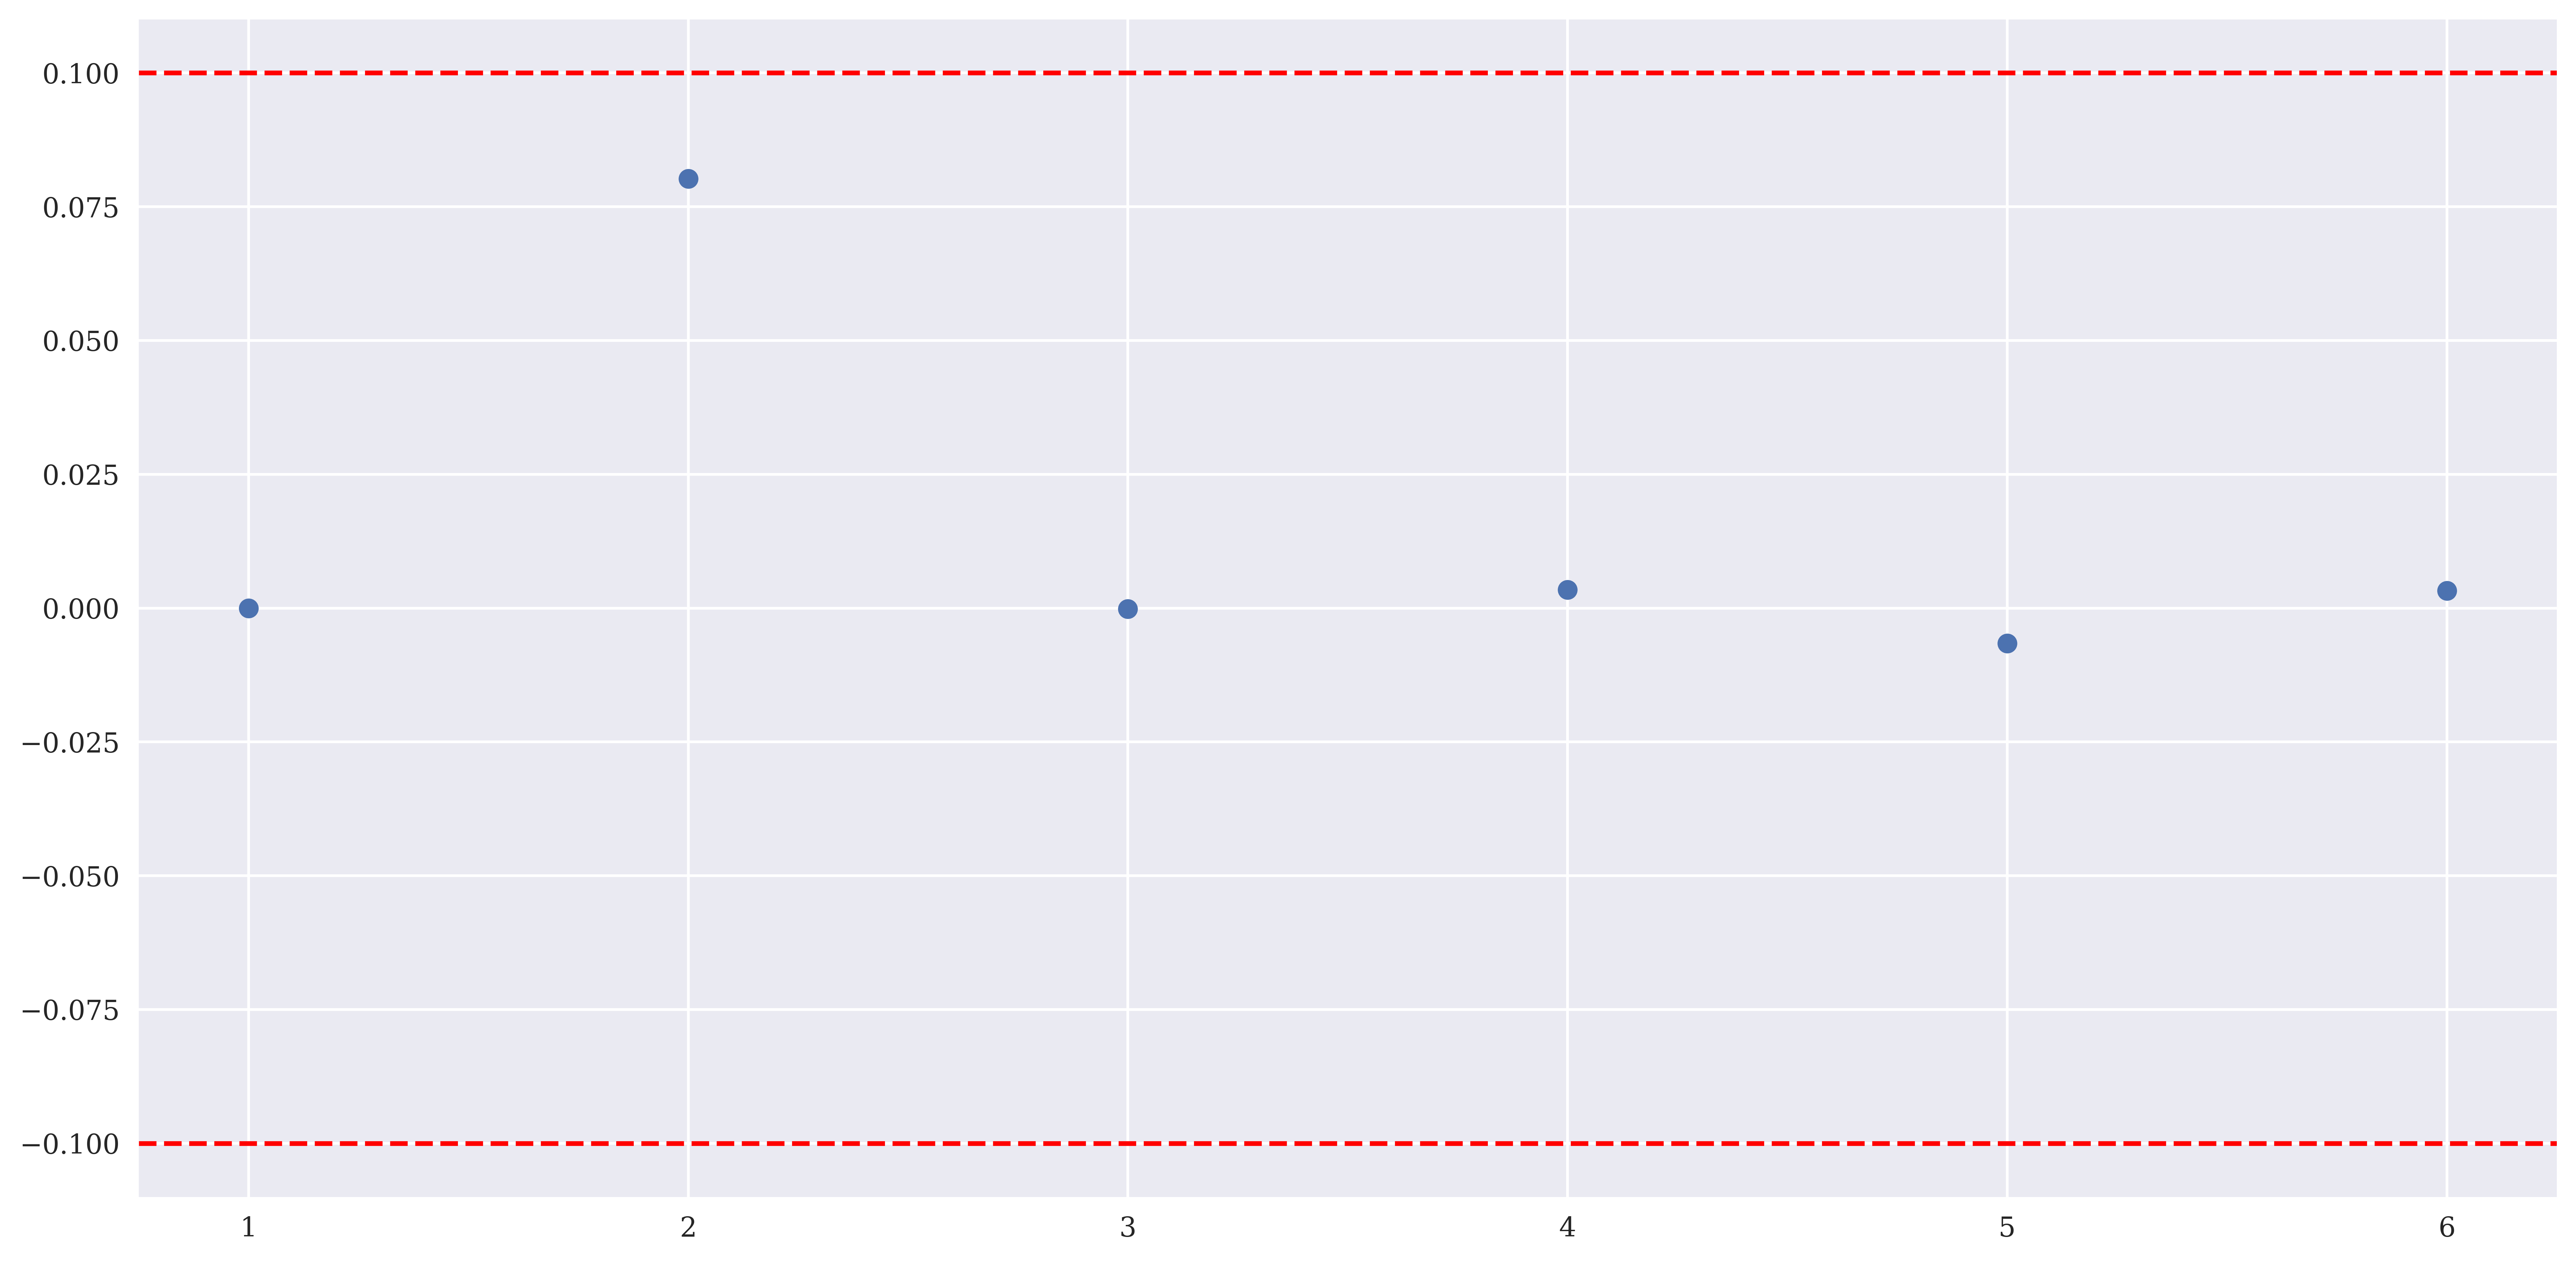

In [191]:
plt.figure(figsize=(16,8),dpi=600)
plt.scatter(np.array([i+1 for i in range(len(residual))]),residual)
plt.axhline(y=0.10,ls='--',c='r')
plt.axhline(y=-0.1,ls='--',c='r')
plt.show()

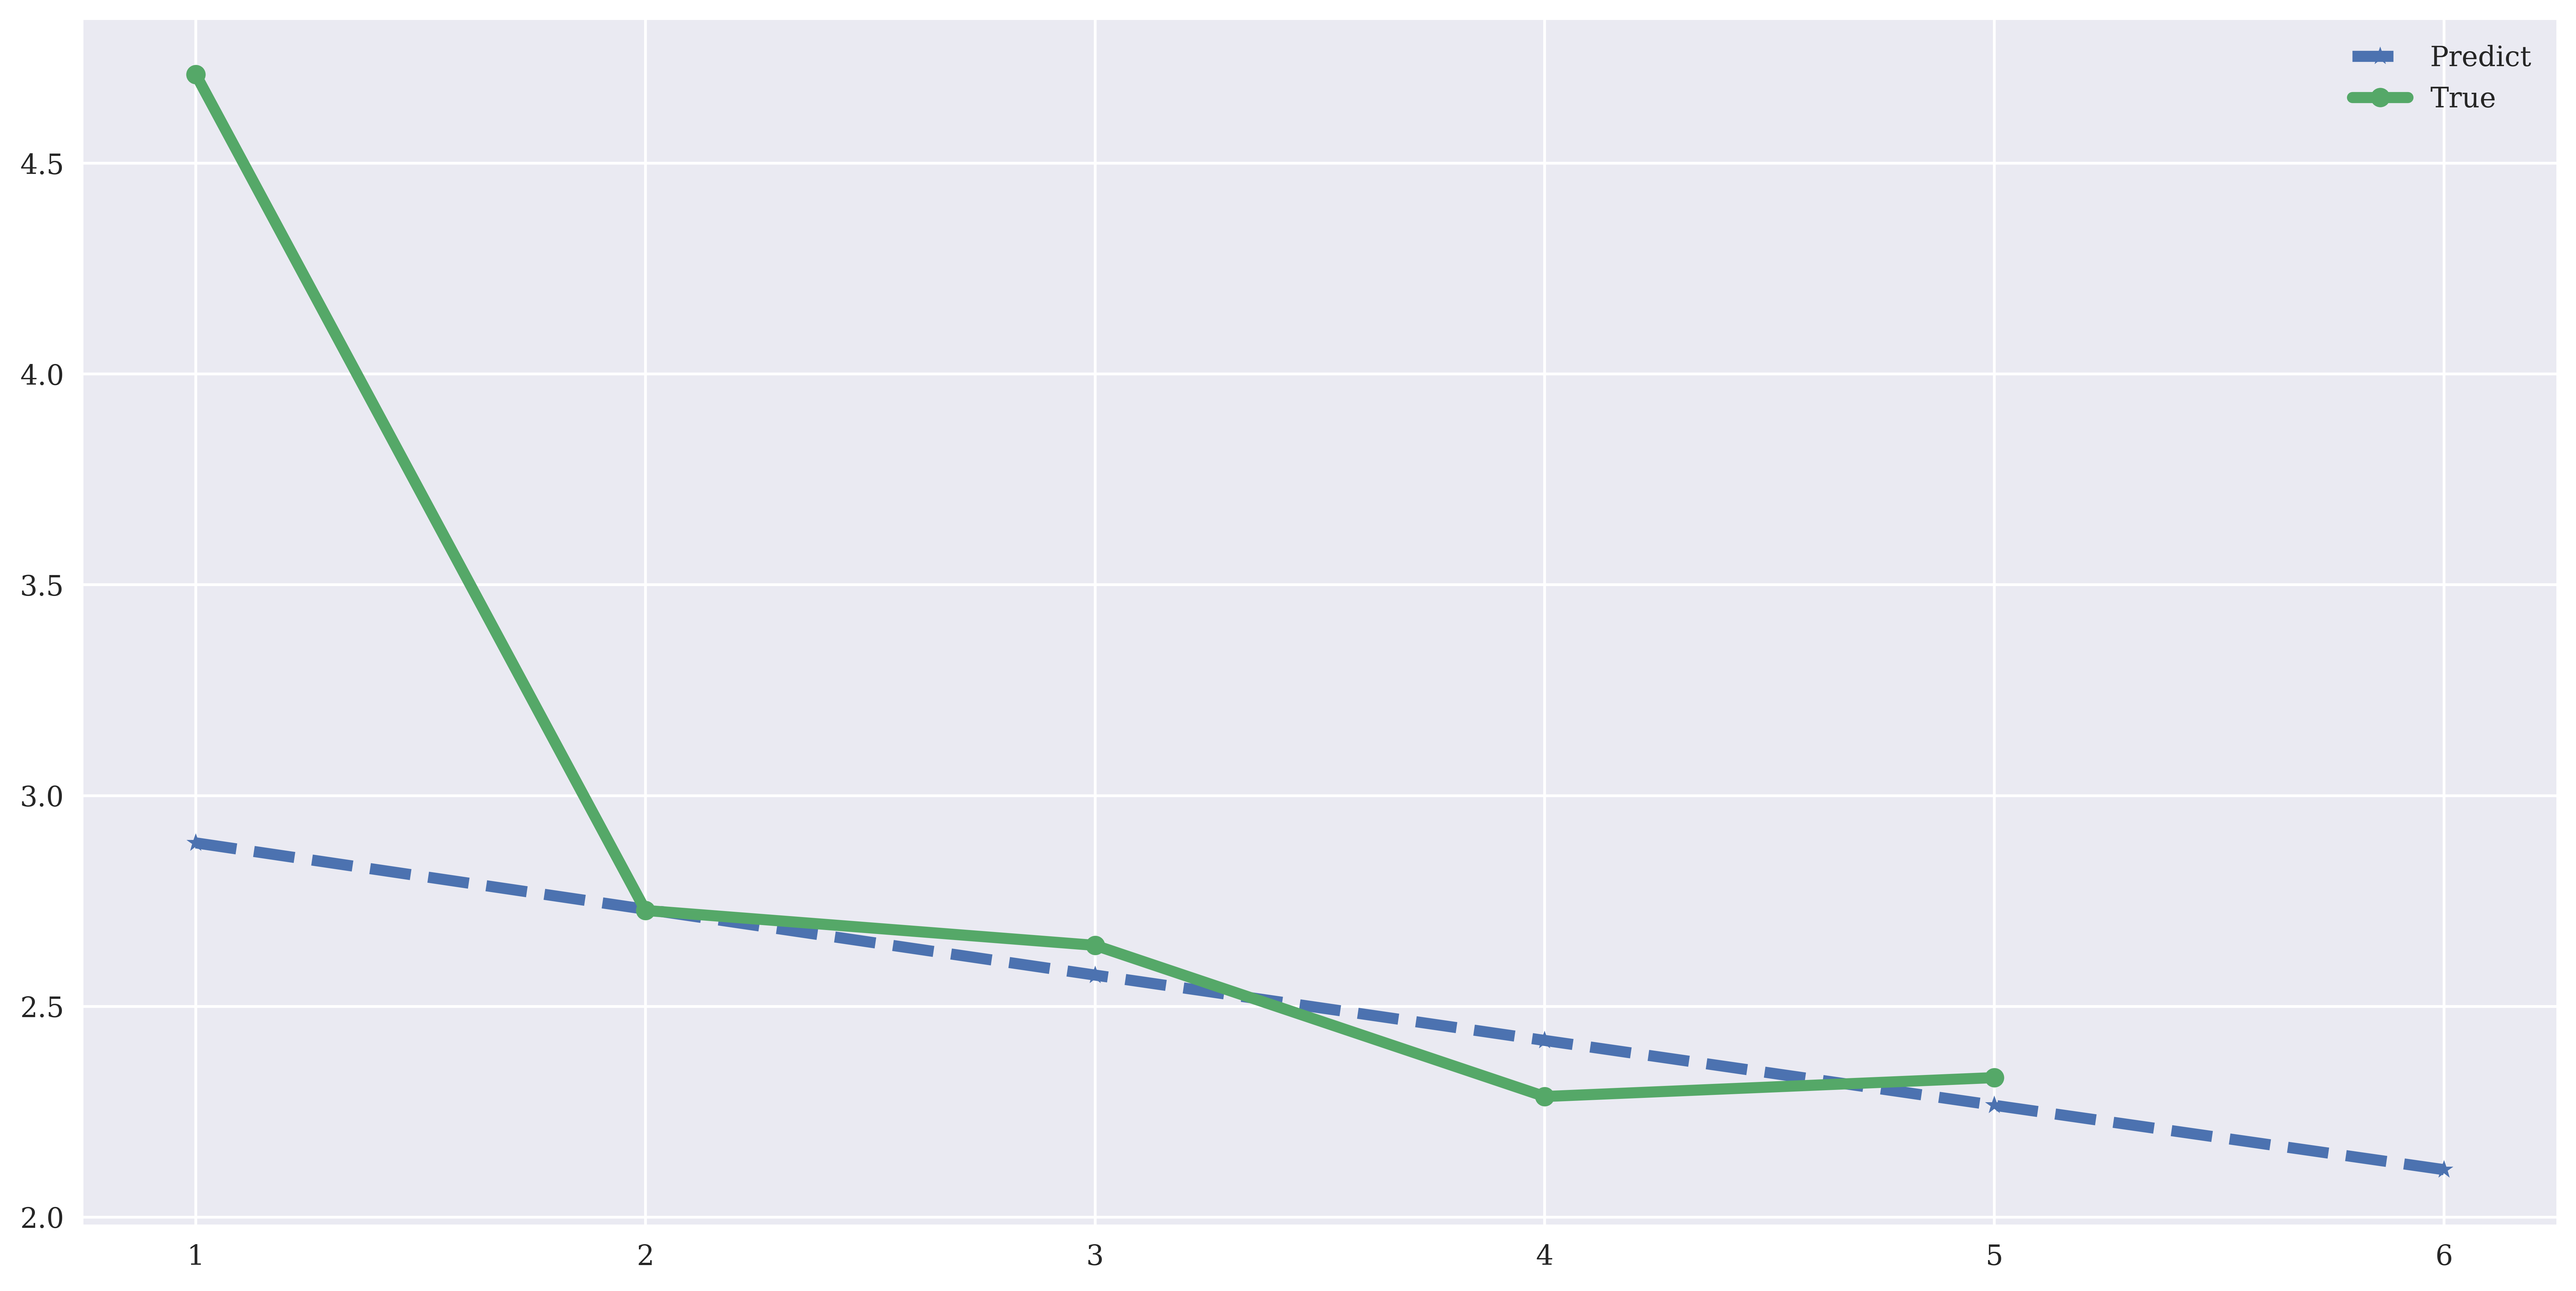

In [193]:
#绘制预测数据的分布图像
predict_list=[]
for i in range(0,6):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-18)
plt.figure(figsize=(16,8),dpi=600)
#plt.title('line chart')
plt.plot([i+1 for i in range(len(predict_list))],predict_list,marker='*',lw=4,ls='--')
plt.plot([i+1 for i in range(len(t))],t-18,marker='o',lw=4)
plt.ylabel('')
#注意legend里面传的参数是列表
plt.legend(['Predict','True'])
plt.show()

In [160]:
import math
#观察出来时刻数列是 3，8，10，14，17
t=np.array(hiv_low_list)
t=t+15
#将数列进行一次累加求和
t1=np.cumsum(t)
print(t1)

[20.26031746 38.47301587 56.47142857 74.49047619 92.57936508]


In [161]:
min=math.e**(-2/(len(t)+1))
max=math.e**(2/(len(t)+2))
#首先验证阶比是否满足条件
for i in range(2,len(t)):
    j=t[i-1]/t[i]
    if(j<min or j>max):
        print(i)

In [162]:
#生成邻均值数列（相邻两个数据的均值）
z1= ((t1[:len(t1) - 1] + t1[1:])/2.0).reshape(-1,1)
print(z1)

[[29.36666667]
 [47.47222222]
 [65.48095238]
 [83.53492063]]


In [163]:
Y=t[1:].reshape(-1,1)
B=np.append(-z1,np.ones_like(z1),axis=1)
print(B)

[[-29.36666667   1.        ]
 [-47.47222222   1.        ]
 [-65.48095238   1.        ]
 [-83.53492063   1.        ]]


In [164]:
#使用最小二乘法求解a，b的值（感谢大佬铺路）
[[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Y)#计算待估参数
#第i时刻的预测值，解一阶累加得到的方程（注意下标 2，3，4，.....）
#predict=(t[0]-b/a)*np.exp(-a*(i-1))-(t[0]-b/a)*np.exp(-a*(i-2))
residual=np.array([0])
predict_list=[]
for i in range(0,len(t)):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-15)
    residual=np.append(residual,(t[i]-predict)/t[i])
print(a,b)

0.0019463666259302292 18.189660947481638


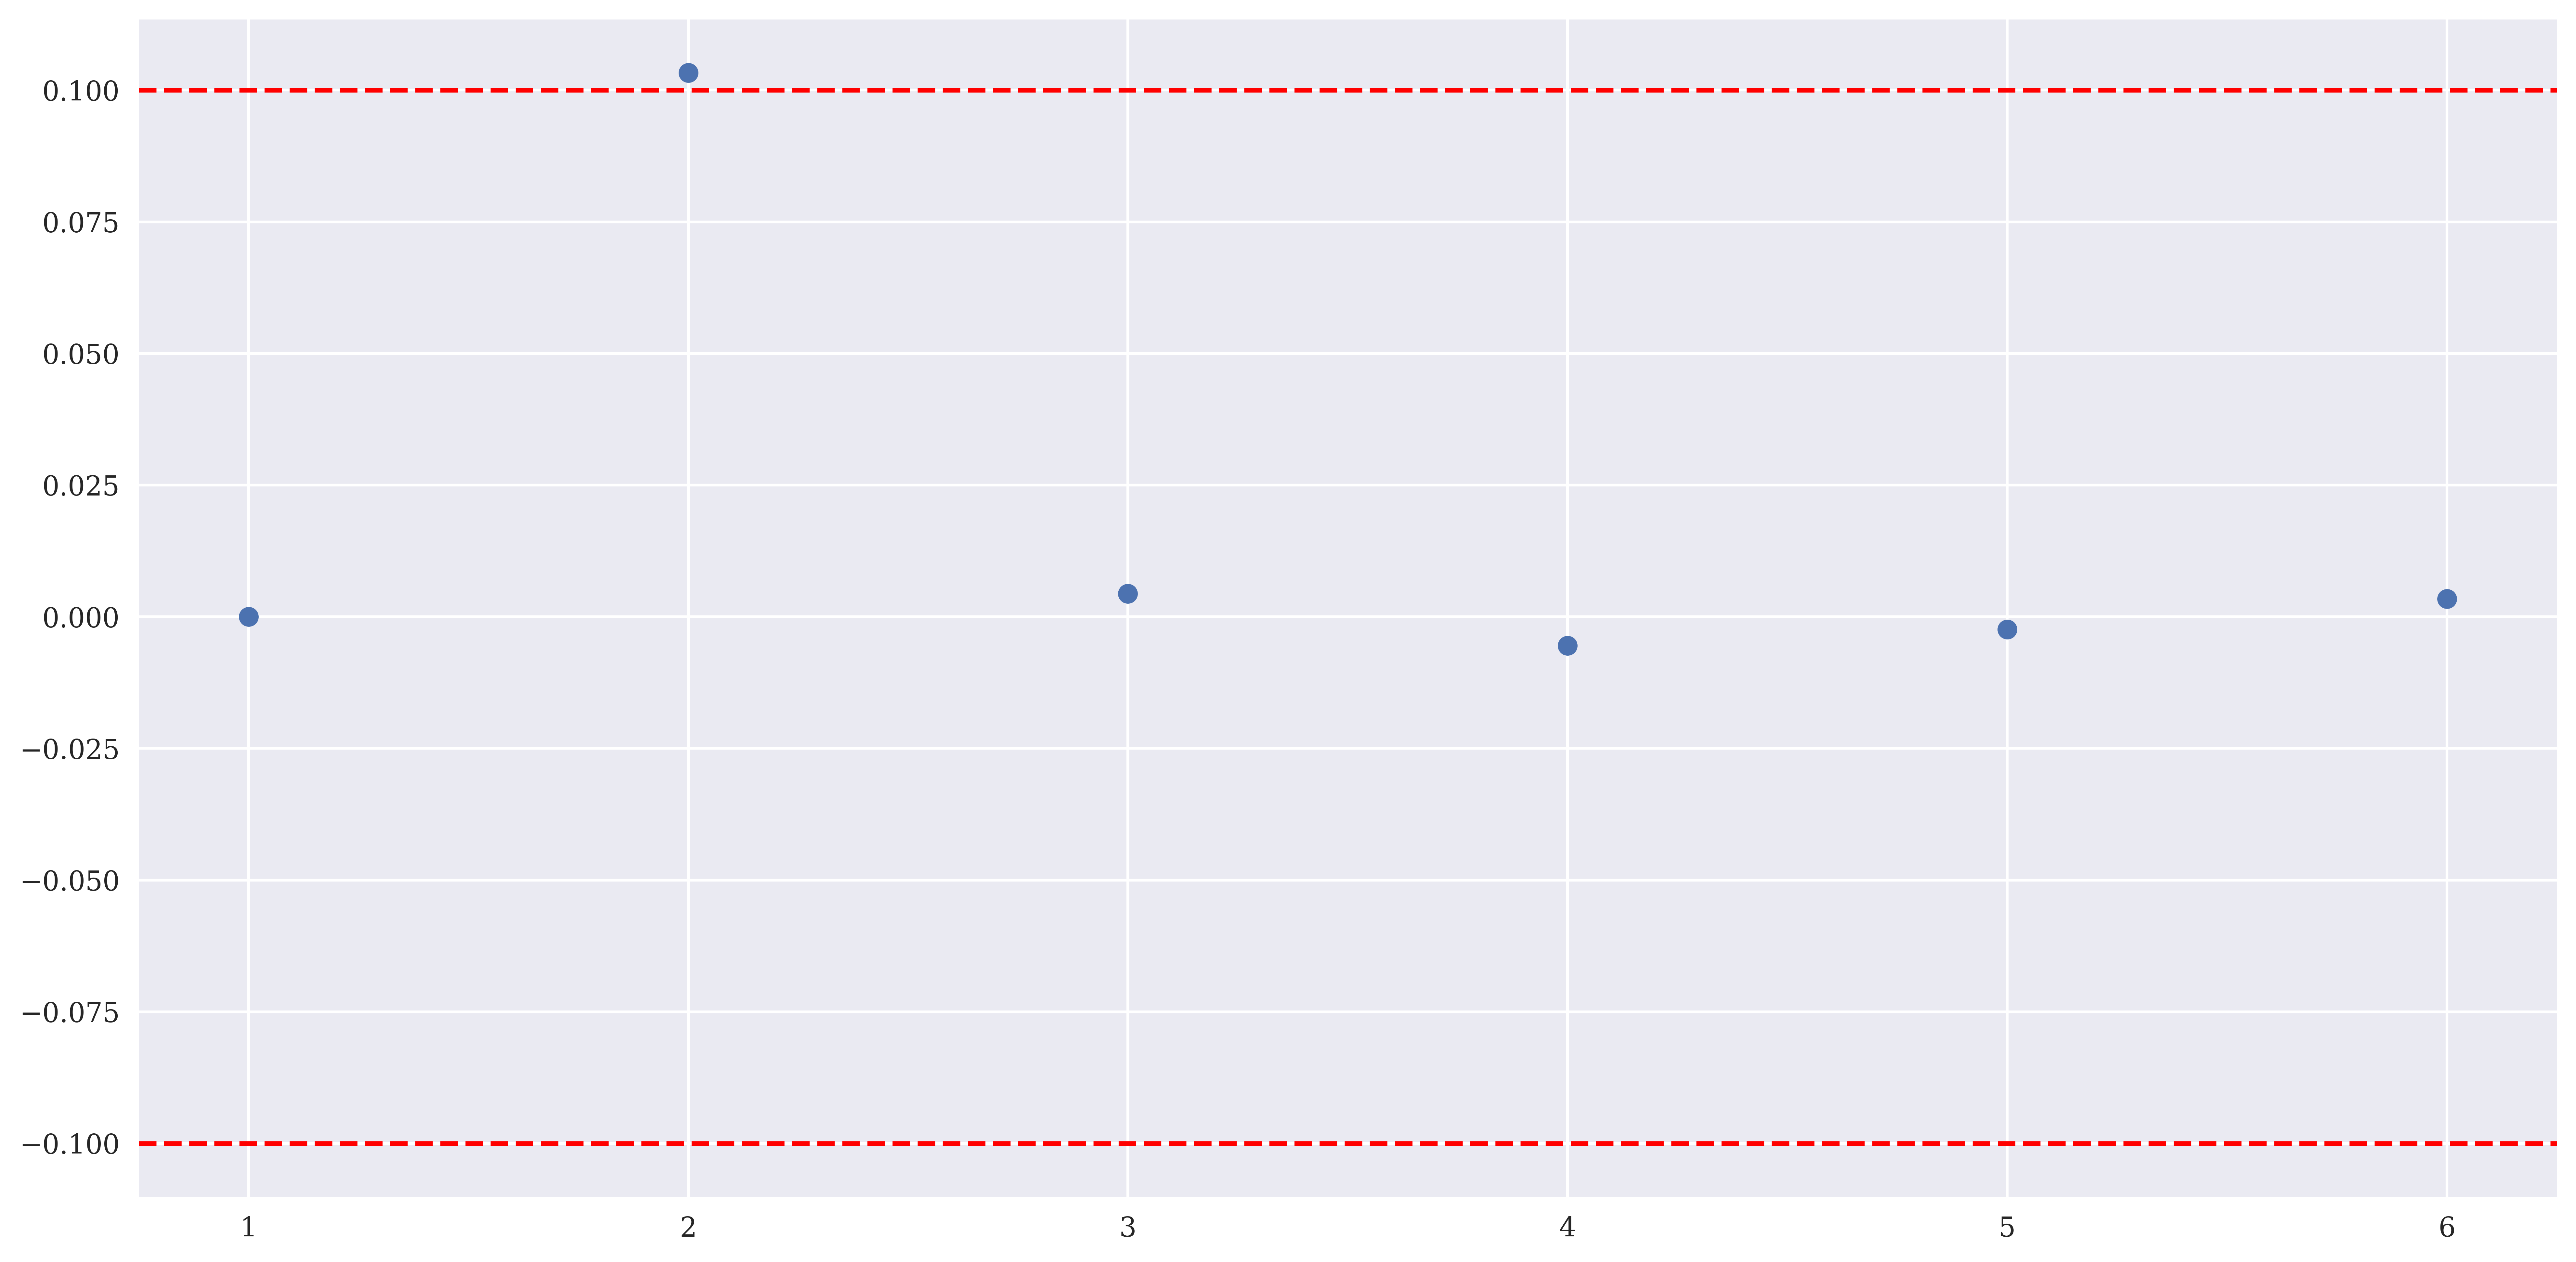

In [165]:
plt.figure(figsize=(16,8),dpi=600)
plt.scatter(np.array([i+1 for i in range(len(residual))]),residual)
plt.axhline(y=0.10,ls='--',c='r')
plt.axhline(y=-0.1,ls='--',c='r')
plt.show()

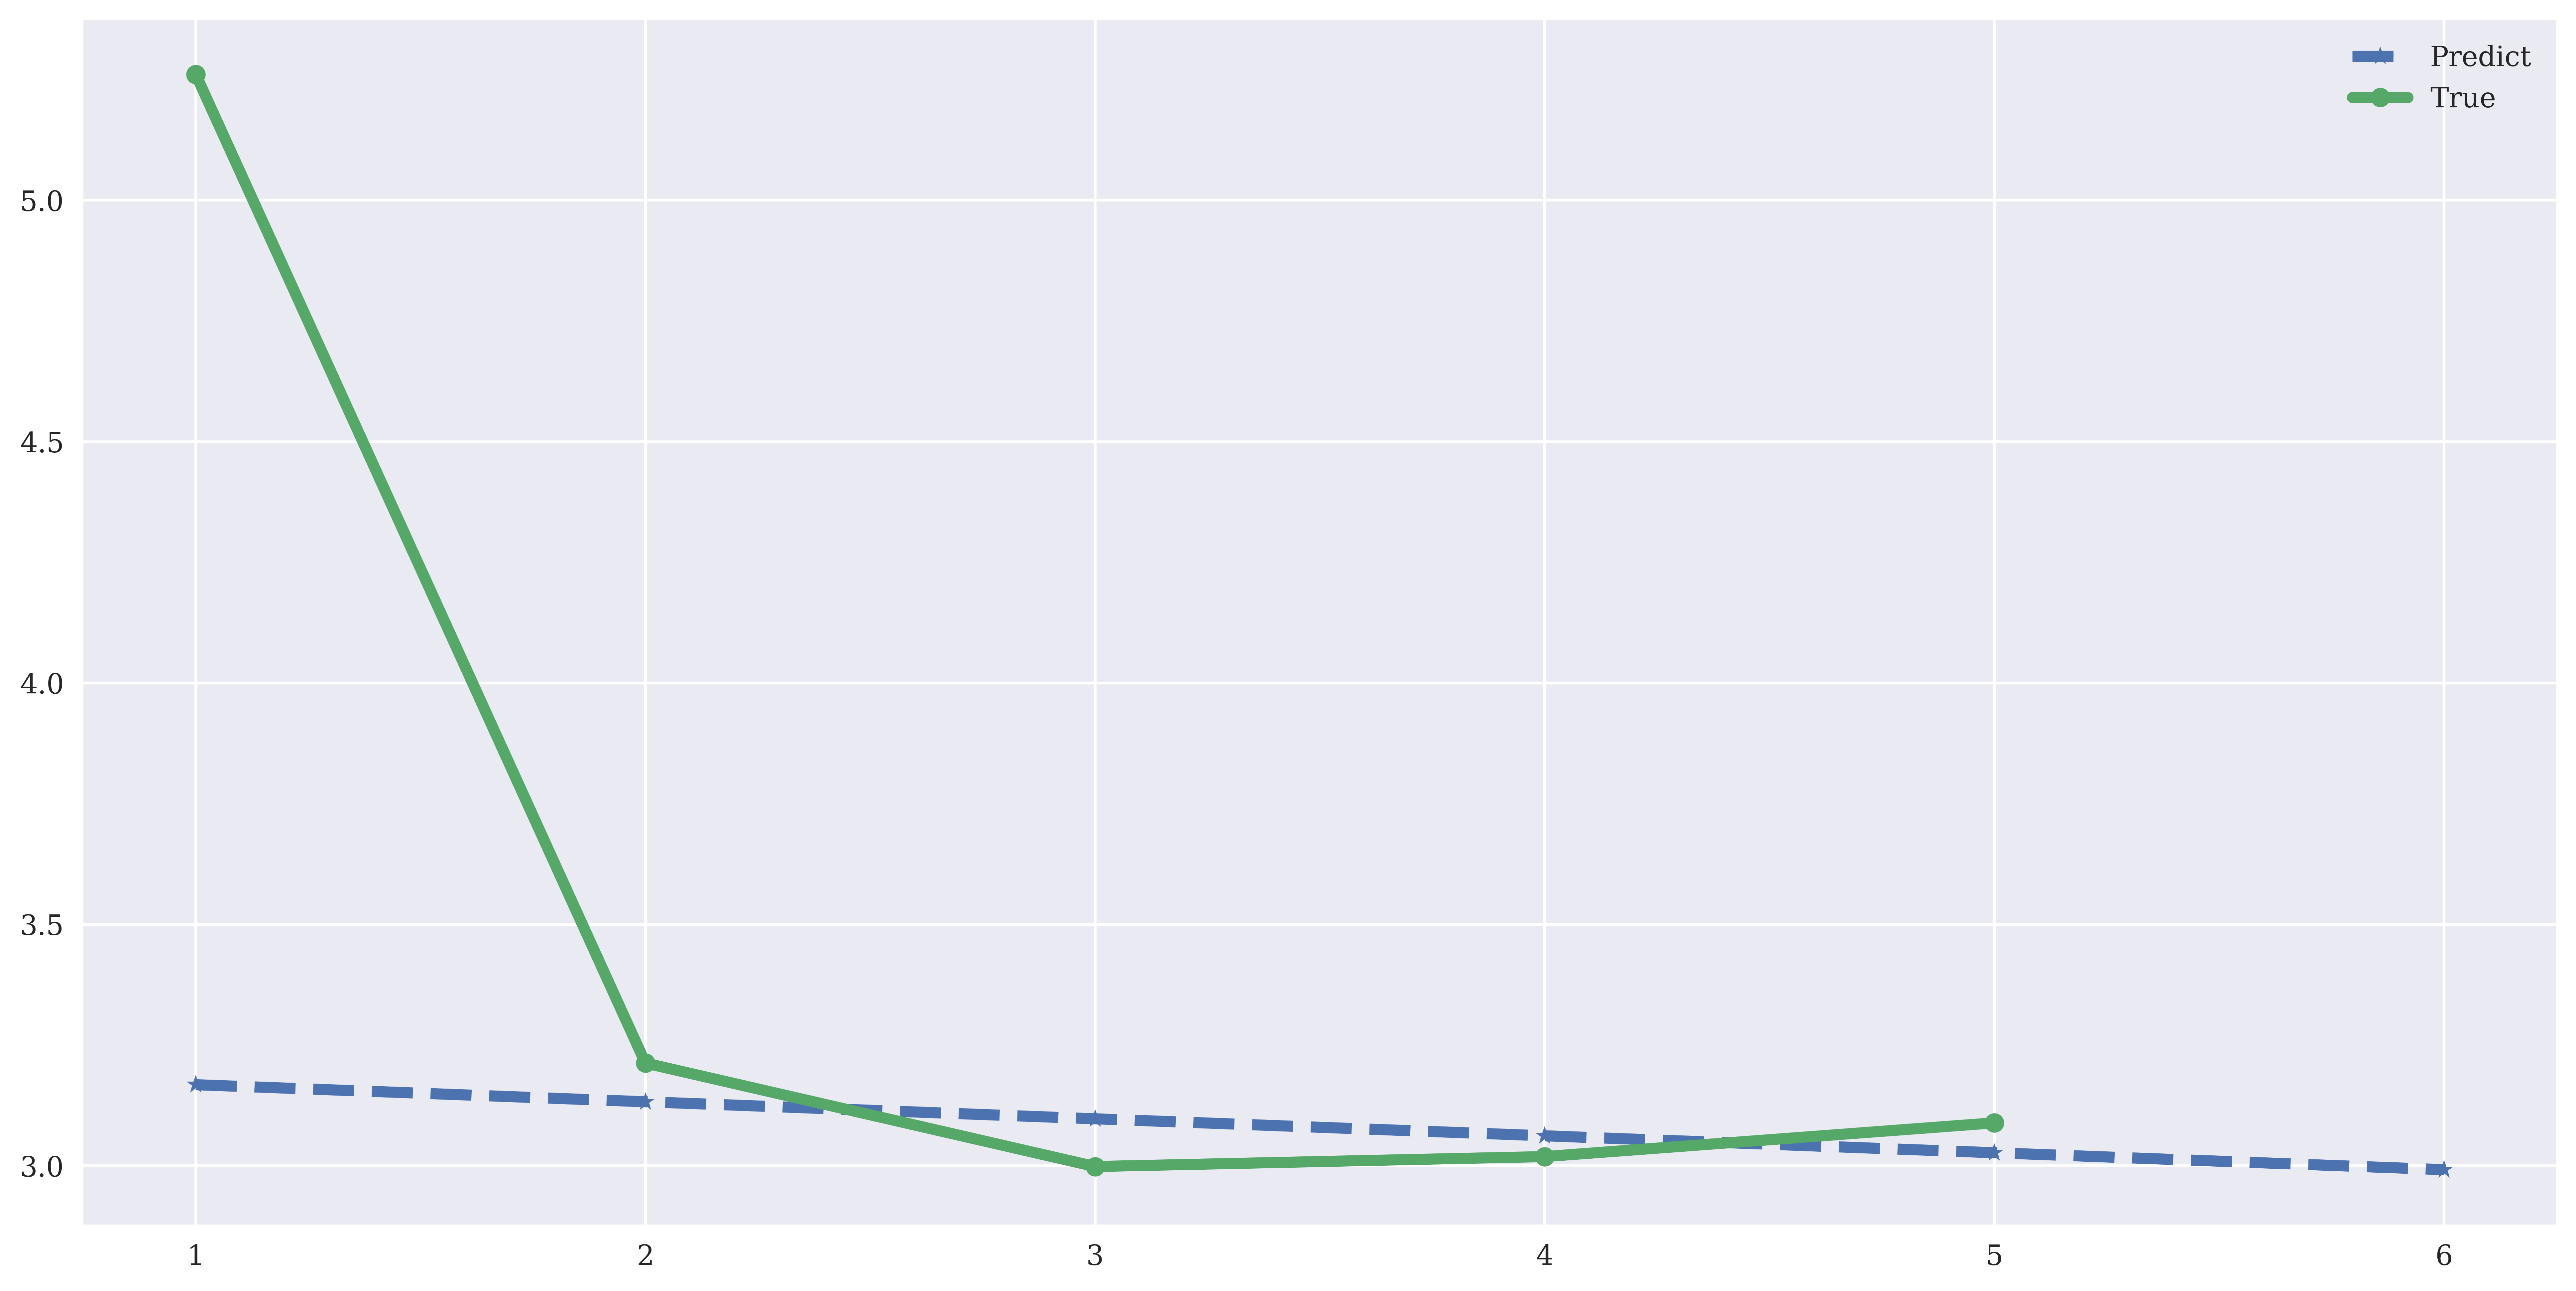

In [166]:
#绘制预测数据的分布图像
predict_list=[]
for i in range(0,6):
    predict=(t[0]-b/a)*np.exp(-a*(i))-(t[0]-b/a)*np.exp(-a*(i-1))
    predict_list.append(predict-15)
plt.figure(figsize=(16,8),dpi=600)
#plt.title('line chart')
plt.plot([i+1 for i in range(len(predict_list))],predict_list,marker='*',lw=4,ls='--')
plt.plot([i+1 for i in range(len(t))],t-15,marker='o',lw=4)
plt.ylabel('')
#注意legend里面传的参数是列表
plt.legend(['Predict','True'])
plt.show()

